In [213]:
import csv
import numpy as np
import seaborn as sns
import pandas as pd

! sh ~/Projects/coursework/mpi_collective/copy_txt_to_local.sh
! rm -rf ./txt_barrier
! rm -rf ./txt_alltoall
! cp -r ~/Projects/coursework/mpi_collective/txt_barrier ./txt_barrier
! cp -r ~/Projects/coursework/mpi_collective/txt_alltoall ./txt_alltoall
! ls

   Lomonosov-2 supercomputer welcomes you!


barrier.txt                                   100%  253    25.5KB/s   00:00    
barrier.csv                                   100%  556   104.8KB/s   00:00    
   Lomonosov-2 supercomputer welcomes you!


alltoall.csv                                  100%  417    57.9KB/s   00:00    
alltoall.txt                                  100%  483   111.9KB/s   00:00    
Untitled.ipynb txt_alltoall   txt_barrier


https://seaborn.pydata.org/examples/simple_violinplots.html


In [214]:
def print_results(test_type):
    txt_path = f"./txt_{test_type}/{test_type}.txt"
    csv_path = f"./txt_{test_type}/{test_type}.csv"

    with open(txt_path, "r") as txt_file:
        for row in txt_file:
            if row.startswith(test_type):
                print(row, end="")
        
    print()

    with open(csv_path, newline='') as csv_file:
        spamreader = csv.reader(csv_file, delimiter=',')
        for row in spamreader:
            a = []
            for i in range(1, len(row)):
                a.append(float(row[i][:8]))

            timestr = row[0]
            mean = sum(a)/len(a)
            xmin = min(a)
            xmax = max(a)
            
            print(f'{timestr}\n{a}\nmean = {mean}\nmin = {xmin}\nmax = {xmax}\n')
    
    

In [215]:
print_results("barrier")
print(f"\n{'-' * 70}\n")
print_results("alltoall")

barrier,100000,4.347500e+02,2022-04-20,19:19:09,19:26:24
barrier,100000,2.601351e+00,2022-04-20,19:51:59,19:52:02
barrier,100000,4.310270e+02,2022-04-20,21:06:51,21:14:02
barrier,100000,8.295510e+02,2022-04-20,21:44:40,21:58:30

19:26:24
[5.223199, 3.8763, 3.8844, 3.9684, 4.091, 4.0785, 4.5366, 4.8708, 4.3476, 4.600999]
mean = 4.3477798000000005
min = 3.8763
max = 5.223199

19:52:02
[2.180212, 5.182201, 3.678012, 5.1764, 5.181793, 5.181835, 3.676441, 5.181898, 5.179036, 3.676697]
mean = 4.4294525
min = 2.180212
max = 5.182201

21:14:02
[5.850099, 4.345999, 4.0414, 4.6531, 3.924599, 3.786801, 3.9044, 3.9278, 4.2258, 4.446202]
mean = 4.310619999999999
min = 3.786801
max = 5.850099

21:58:30
[1.47372, 1.41079, 1.36895, 1.06475, 8.832901, 4.533, 4.0374, 3.8494, 4.2822, 4.2441]
mean = 3.5097211
min = 1.06475
max = 8.832901


----------------------------------------------------------------------

alltoall,100000,256,4.607070e+02,2022-04-20,18:54:30,19:02:11
alltoall,100000,256,3.005681e+00,2

In [199]:
def get_results_data(test_type):
    csv_path = f"./txt_{test_type}/{test_type}.csv"

    with open(csv_path, newline='') as csv_file:
        spamreader = csv.reader(csv_file, delimiter=',')
        data = {}
        for row in spamreader:
            a = []
            for i in range(1, len(row)):
                a.append(float(row[i][:8]))

            timestr = row[0]
            data[timestr] = a
        return pd.DataFrame(data)

In [216]:
data = get_results_data("barrier")
# data = get_results_data("alltoall")
# data = data.drop(columns=['06:28:49'])
data_mean = pd.DataFrame(data.mean(axis=0), columns=['mean'])

[(1.0, 9.0), (-0.5, 3.5)]

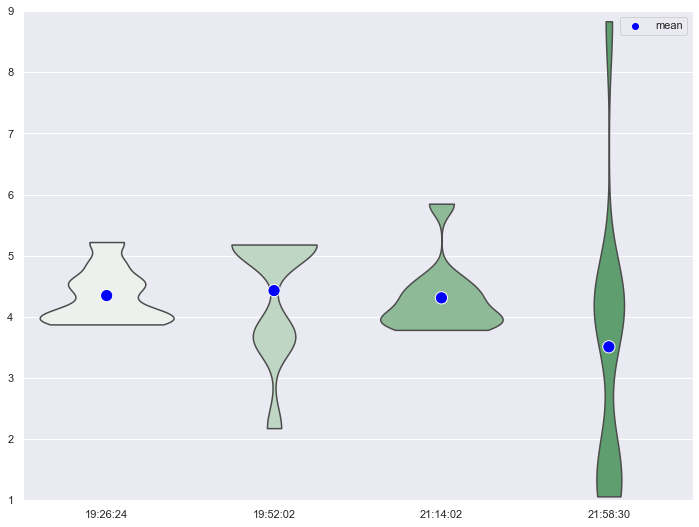

In [232]:
sns.set_theme()
sns.set(rc={'figure.figsize':(12, 9)})
sns.violinplot(data=data, palette="light:g", cut=0, inner=None, bw=0.3)
sns.scatterplot(data=data_mean, palette=['blue'], s=150, markers=['o'])\
.set(xlim=(-0.5, len(data.columns) - 0.5), ylim=(1, 9))

In [22]:
! cp ./Untitled.ipynb ~/Projects/coursework/mpi_collective/Untitled.ipynb